<a href="https://colab.research.google.com/github/VoznesenskayaV/LabOP/blob/main/4_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.PANDAS**

**Введение**

Для того чтобы эффективно работать с этой библиотекой, нужно понять основные структуры данных.
**Series** – это структура данных принципиально похожая на список и словарь в Python. Используется в качестве столбцов в таблице.
**DataFrame** – если говорить простыми словами, то эта структура данных представляет из себя обычную таблицу. Иными словами табличная структура данных. Как и во всех таблицах она состоит из строк и столбцов. Столбцами выступают объекты **Series**, а строки его элементы.


In [1]:
import numpy as np



**Использование**

Чтобы показать библиотеку в работе, нам нужны какие нибудь статистические данные, для примера давайте возьмем [данные ВВП](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%92%D0%92%D0%9F_(%D0%BD%D0%BE%D0%BC%D0%B8%D0%BD%D0%B0%D0%BB)) 5 разных стран по версии всемирного банка и попробуем сформировать из них таблицу. Передавать данных в DataFrame мы будем используя знакомый синтаксис словаря Python.


In [2]:
import pandas as pd

df = pd.DataFrame({
    'Страна': ['США', 'Китай', 'Россия', 'Турция', 'ЮАР'],
    '2018 год': [20612, 13842, 1665, 780, 368],
    '2019 год': [21433, 14402, 1702, 761, 351],
})

df



,Страна,2018 год,2019 год
0,США,20612,21433
1,Китай,13842,14402
2,Россия,1665,1702
3,Турция,780,761
4,ЮАР,368,351


Объект **DataFrame** имеет два индекса по столбцам и строкам. Если индекс по строкам не указан вручную, то pandas задает его автоматически.

**Индексы**

Назначать индексы объекту **DataFrame** можно при его создании или в процессе работы с ним.


In [3]:
import pandas as pd

df = pd.DataFrame({
    'Страна': ['США', 'Китай', 'Россия', 'Турция', 'ЮАР'],
    '2018 год': [20612, 13842, 1665, 780, 368],
    '2019 год': [21433, 14402, 1702, 761, 351],
}, index=['US', 'CN', 'RU', 'TR', 'ZA']

)

df

,Страна,2018 год,2019 год
US,США,20612,21433
CN,Китай,13842,14402
RU,Россия,1665,1702
TR,Турция,780,761
ZA,ЮАР,368,351


Вызывая метод **DataFrame** мы передали ему аргумент **index** со списком именованных индексов.

# **Фильтрация данных**

Pandas позволяет производить фильтрацию вывода по индексам и столбцам. Так же можно комбинировать индексы и колонки, использовать слайсы и логические выражения.



**По столбцу**

Обращение к столбцам в pandas реализовано стандартным образом, так как будто вы обращаетесь к ключу словаря, или же к методу объекта. В моем случае обращение как к методу объекта невозможно, я выбрал кириллическое название столбца, а работает только с латиницей

In [4]:
df["Страна"]

US       США
CN     Китай
RU    Россия
TR    Турция
ZA       ЮАР
Name: Страна, dtype: object

**По строковому индексу**

Для обращения к строковым индекса существуют два метода
1.   **loc** – для доступа по именованному индексу
2.   **iloc** – для доступа по числовому индексу

In [5]:
df.loc["RU"]

Страна      Россия
2018 год      1665
2019 год      1702
Name: RU, dtype: object

Обращение к именованному индексу **RU**

In [6]:
df.iloc[0]

Страна        США
2018 год    20612
2019 год    21433
Name: US, dtype: object

Обращение к числовому индексу

**По срезами**

Объект **DataFrame** поддерживает использование срезов.


In [7]:
df[2:]

,Страна,2018 год,2019 год
RU,Россия,1665,1702
TR,Турция,780,761
ZA,ЮАР,368,351


Отобразим все строки начиная с 3.

**С использованием условий**

Мы так же можем использовать логику в фильтрации данных. Давайте отобразить странны, в которых ВВП на душу населения в 2019 году был больше 761$


In [8]:
df[df["2019 год"] > 761]['Страна']

US       США
CN     Китай
RU    Россия
Name: Страна, dtype: object

# **Работа с столбцами**

Вы можете создавать, удалять и переименовывать ваши столбцы в любой момент времени.


**Переименование**

Для переименования столбца существует метод rename
Давайте переименуем наши столбцы с указанием года.

In [9]:
df.rename(columns={'2018 год': '2018', '2019 год': '2019'})

,Страна,2018,2019
US,США,20612,21433
CN,Китай,13842,14402
RU,Россия,1665,1702
TR,Турция,780,761
ZA,ЮАР,368,351


Метод **rename** на вход принимает обычный словарь, ключ который является текущем названием столбца, а значение – новым. За один раз мы можем переименовать сколько угодно столбцов, главное не забывайте разделять элементы словаря запятой.

**Важно**: результат выполнение метода rename возвращает новый измененный объект **DataFrame**, поэтому переназначь основной экземпляр **DataFrame**.


**Создание**

Создадим новую колонку “Рост” и наполним ее значениями высчитанными из разницы 2019 к 2018 году.


In [10]:
dfr=df.rename(columns={'2018 год': '2018', '2019 год': '2019'})

In [11]:
dfr["Рост"] = dfr['2019'] - dfr['2018']
dfr

,Страна,2018,2019,Рост
US,США,20612,21433,821
CN,Китай,13842,14402,560
RU,Россия,1665,1702,37
TR,Турция,780,761,-19
ZA,ЮАР,368,351,-17


**Удаление**

Для удаления столбца существует метод **drop**, так же необходимо передать в аргумент **axis** значение **index** или **columns**.


In [12]:
dfr.drop(["Рост"], axis="columns")

,Страна,2018,2019
US,США,20612,21433
CN,Китай,13842,14402
RU,Россия,1665,1702
TR,Турция,780,761
ZA,ЮАР,368,351


**Важно:** результат выполнение метода **drop** возвращает новый измененный объект **DataFrame**, поэтому не забудьте переназначить **DataFrame**.

In [13]:
dfr

,Страна,2018,2019,Рост
US,США,20612,21433,821
CN,Китай,13842,14402,560
RU,Россия,1665,1702,37
TR,Турция,780,761,-19
ZA,ЮАР,368,351,-17


In [14]:
dfr2=dfr.drop(["Рост"], axis="columns")
dfr2

,Страна,2018,2019
US,США,20612,21433
CN,Китай,13842,14402
RU,Россия,1665,1702
TR,Турция,780,761
ZA,ЮАР,368,351


# **Загрузка данных**

**API** загрузки данных имеет поддержку множество структурированных форматов. Для примера возьмем информацию из [Реестра аккредитованных образовательных учреждений, расположенных на территории субъектов Российской Федерации](https://data.mos.ru/opendata/2021). На сайте есть ссылочка для скачивания таблиц в формате **CSV** и **MS Excel** эти два формата мы и рассмотрим.


**Из таблицы CSV**

Осуществить загрузку данных в таблицу можно используя метод **read_csv**


In [15]:
from google.colab import files
uploaded = files.upload()

Saving data-2021-2999-01-01.csv to data-2021-2999-01-01.csv


In [16]:
# Загрузим данные из csv документа
data_csv = pd.read_csv("data-2021-2999-01-01.csv", sep=';')

In [17]:
data_csv

,ID,FullName,INN,OGRN,AccreditationAuthority,Education,CertificateNumber,CertificateIssueDate,Validity,CertificateFormSeries,CertificateFormNumber,global_id,Unnamed: 12
0,Код,Полное официальное наименование,ИНН,ОГРН,Наименование аккредитационного органа,Образовательные программы,Номер свидетельства,Дата выдачи свидетельства,Срок действия,Серия бланка свидетельства об аккредитации,Номер бланка свидетельства об аккредитации,global_id,NaN
1,41,Государственное бюджетное общеобразовательное ...,7701375995,5137746011035,Департамент образования и науки города Москвы,nested data,003991,11.12.2015,бессрочно,77А01,0003991,39801198,NaN
2,42,Государственное бюджетное общеобразовательное ...,7708071876,1027700388363,Департамент образования и науки города Москвы,nested data,005069,31.03.2023,бессрочно,77А01,0005078,39801200,NaN
3,43,Государственное бюджетное общеобразовательное ...,7704118139,1027700587672,Департамент образования и науки города Москвы,nested data,004773,16.04.2018,бессрочно,77А01,0004773,39801201,NaN
4,44,Государственное бюджетное общеобразовательное ...,7720325492,5157746151921,Департамент образования и науки города Москвы,nested data,004148,12.02.2016,бессрочно,77А01,0004148,39801202,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1744,Общеобразовательная автономная некоммерческая ...,7734442284,1217700192270,Департамент образования и науки города Москвы,nested data,005076,25.04.2023,бессрочно,77А01,0005085,2587699839,NaN
908,1745,Общеобразовательная автономная некоммерческая ...,9710048229,1187700002489,Департамент образования и науки города Москвы,nested data,005077,10.05.2023,бессрочно,77А01,0005086,2591903817,NaN
909,1746,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОБЩЕОБРАЗОВАТЕЛЬНАЯ ...,9715404872,1217700376772,Департамент образования и науки города Москвы,nested data,005082,02.06.2023,бессрочно,77А01,0005091,2591903819,NaN
910,1748,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ПРОФЕССИ...,7730265193,1217700253594,Департамент образования и науки города Москвы,nested data,А007-01298-77/00734966,04.10.2023,бессрочно,-,-,2631638596,NaN


In [18]:
!rm data-6322-2022-10-06.xlsx

rm: cannot remove 'data-6322-2022-10-06.xlsx': No such file or directory


**Из таблицы MS Excel**

За загрузку данных из **excel** таблицы отвечает метод **read_excel**


In [19]:
from google.colab import files
uploaded = files.upload()

Saving dataxl.xlsx to dataxl.xlsx


In [20]:
!ls

data-2021-2999-01-01.csv  dataxl.xlsx  sample_data


In [21]:
data_xlsx = pd.read_excel("dataxl.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
data_xlsx

,ID,FullName,INN,OGRN,AccreditationAuthority,Education,CertificateNumber,CertificateIssueDate,Validity,CertificateFormSeries,CertificateFormNumber,global_id
0,Код,Полное официальное наименование,ИНН,ОГРН,Наименование аккредитационного органа,Образовательные программы,Номер свидетельства,Дата выдачи свидетельства,Срок действия,Серия бланка свидетельства об аккредитации,Номер бланка свидетельства об аккредитации,global_id
1,41,Государственное бюджетное общеобразовательное ...,7701375995,5137746011035,Департамент образования и науки города Москвы,Education:начальное общее образование\n\nEduca...,003991,11.12.2015,бессрочно,77А01,0003991,39801198
2,42,Государственное бюджетное общеобразовательное ...,7708071876,1027700388363,Департамент образования и науки города Москвы,Education:начальное общее образование\n\nEduca...,005069,31.03.2023,бессрочно,77А01,0005078,39801200
3,43,Государственное бюджетное общеобразовательное ...,7704118139,1027700587672,Департамент образования и науки города Москвы,Education:основное общее образование\n\nEducat...,004773,16.04.2018,бессрочно,77А01,0004773,39801201
4,44,Государственное бюджетное общеобразовательное ...,7720325492,5157746151921,Департамент образования и науки города Москвы,Education:начальное общее образование\n\nEduca...,004148,12.02.2016,бессрочно,77А01,0004148,39801202
...,...,...,...,...,...,...,...,...,...,...,...,...
907,1744,Общеобразовательная автономная некоммерческая ...,7734442284,1217700192270,Департамент образования и науки города Москвы,Education:основное общее образование\n\n,005076,25.04.2023,бессрочно,77А01,0005085,2587699839
908,1745,Общеобразовательная автономная некоммерческая ...,9710048229,1187700002489,Департамент образования и науки города Москвы,Education:начальное общее образование\n\n,005077,10.05.2023,бессрочно,77А01,0005086,2591903817
909,1746,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОБЩЕОБРАЗОВАТЕЛЬНАЯ ...,9715404872,1217700376772,Департамент образования и науки города Москвы,Education:начальное общее образование\n\n,005082,02.06.2023,бессрочно,77А01,0005091,2591903819
910,1748,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ПРОФЕССИ...,7730265193,1217700253594,Департамент образования и науки города Москвы,Education:среднее профессиональное образование...,А007-01298-77/00734966,04.10.2023,бессрочно,-,-,2631638596


In [23]:
data_xlsx.to_excel("country.xlsx",encoding='cp1251')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# **Сохранение данных**

Так же как и в импорте API поддерживает множество форматов для экспорта данных. Воспользуемся данными о ВВП для демонстрации работы.


**В таблицу CSV**

За запись данных в таблицу **CSV** отвечает метод **to_csv**


In [24]:
import pandas as pd

df = pd.DataFrame({
    'Страна': ['США', 'Китай', 'Россия', 'Турция', 'ЮАР'],
    '2018 год': [20612, 13842, 1665, 780, 368],
    '2019 год': [21433, 14402, 1702, 761, 351],
}, index=['US', 'CN', 'RU', 'TR', 'ZA']

)

df.to_csv("country.csv",encoding='cp1251')

Скачивание файлов в локальную файловую систему
Метод **files.download **активирует скачивание файла из браузера на локальный компьютер.

In [25]:
from google.colab import files

files.download('country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**В таблицу MS Excel**

За запись данных в таблицу **MS Excel** отвечает метод **to_excel**


In [26]:
import pandas as pd

df = pd.DataFrame({
    'Страна': ['США', 'Китай', 'Россия', 'Турция', 'ЮАР'],
    '2018 год': [20612, 13842, 1665, 780, 368],
    '2019 год': [21433, 14402, 1702, 761, 351],
}, index=['US', 'CN', 'RU', 'TR', 'ZA']

)

df.to_excel("country.xlsx",encoding='cp1251')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [27]:
from google.colab import files

files.download('country.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Визуализация данных**
Визуализация это большая часть работы в анализе и обработке данных. Не будем сильно углубляться и рассмотрим простой пример визуализации наших данных.


Установка библиотеки **matplotlib**

Для рисования графиков нам понадобится эта библиотека


In [28]:
import matplotlib.pyplot as plt

**Создание графиков**

Самый просто способ сгенерировать график, это передать обработчику данные для одной из координат, для второй он возьмет информацию из индекса.


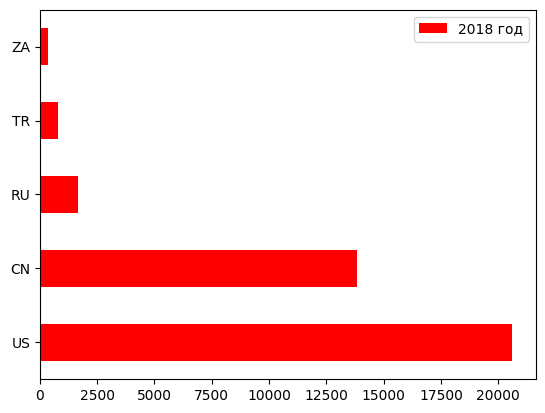

In [29]:
df.plot(kind='barh', y='2018 год', color='red')
plt.show()


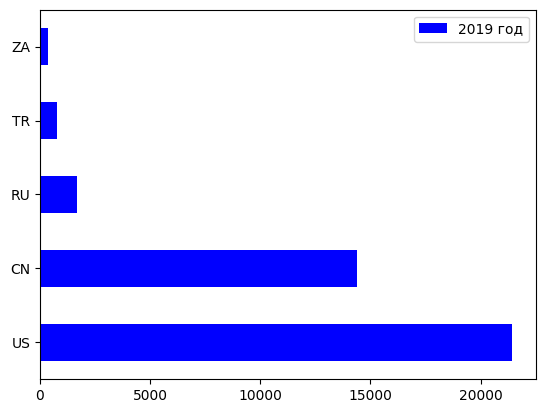

In [30]:
df.plot(kind='barh', y='2019 год', color='blue')
plt.show()

**Объединение данных на одном графике**

У нас есть отдельный график для 2018 и 2019 года, но как их объединить в одной диаграмме? Очень просто, нужно использовать метод pivot из библиотеки **pandas**.


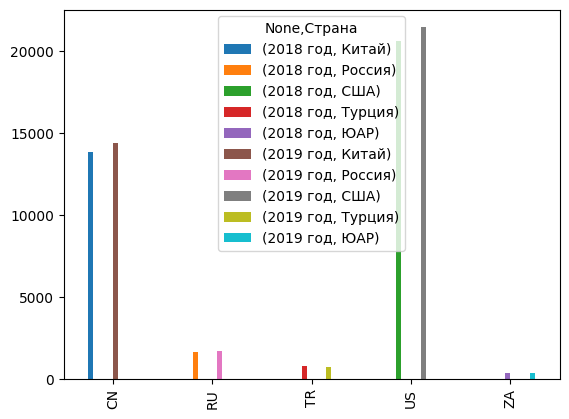

In [31]:
df.pivot(columns="Страна").plot(kind='bar')
plt.show()


# Автоматизация выбора данных (парсинг)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

**ИЗВЛЕЧЕНИЕ ТАБЛИЦ**

Вызовем функцию read_html, передав аргументом ссылку на страницу.

In [33]:
# Список стран по ВВП (номинал)
tables = pd.read_html(
    'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%92%D0%92%D0%9F_(%D0%BD%D0%BE%D0%BC%D0%B8%D0%BD%D0%B0%D0%BB)',
    match='Страна')

In [34]:
len(tables)

4

In [35]:
df = tables[1]
df

,№,Страна,2018,2019
0,1,США,20612,21433
1,2,Китай,13842,14402
2,3,Япония,4952,5080
3,4,Германия,3966,3862
4,5,Индия,2713,2869
...,...,...,...,...
188,183,Маршалловы Острова,22,23
189,184,Кирибати,2,2
190,185,Науру,12,12
191,186,Тувалу,5,5


In [36]:
df1 = tables[0]
df1

,0,1,2,3,4
0,Список МВФ[1] № Страна 2018 2019 1 США 20612 ...,0,Список ВБ[3] № Страна 2018 2019 1 США 20580 2...,0.0,Список ООН[4] № Страна 2018 1 США 20580 2 Ки...
1,№,Страна,2018,2019.0,NaN
2,1,США,20612,21433.0,NaN
3,2,Китай,13842,14402.0,NaN
4,3,Япония,4952,5080.0,NaN
...,...,...,...,...,...
621,193,Науру,018,NaN,NaN
622,194,Кирибати,018,NaN,NaN
623,—,Монтсеррат (Великобритания),006,NaN,NaN
624,195,Тувалу,004,NaN,NaN


**ОБРАБАТЫВАЕМ ТАБЛИЦЫ**

В первую очередь избавимся от лишнего столбца, вызвав метод drop.

In [37]:
df.drop(('№'), axis=1, inplace=True)

In [38]:
df

,Страна,2018,2019
0,США,20612,21433
1,Китай,13842,14402
2,Япония,4952,5080
3,Германия,3966,3862
4,Индия,2713,2869
...,...,...,...
188,Маршалловы Острова,22,23
189,Кирибати,2,2
190,Науру,12,12
191,Тувалу,5,5


In [39]:
print(df.to_string())

                               Страна   2018   2019
0                                 США  20612  21433
1                               Китай  13842  14402
2                              Япония   4952   5080
3                            Германия   3966   3862
4                               Индия   2713   2869
5                      Великобритания   2864   2831
6                             Франция   2789   2716
7                              Италия   2087   2001
8                            Бразилия   1885   1839
9                              Канада   1716   1736
10                             Россия   1665   1702
11                   Республика Корея   1725   1647
12                            Испания   1420   1394
13                          Австралия   1421   1387
14                            Мексика   1222   1258
15                          Индонезия   1042   1120
16                         Нидерланды    914    907
17                  Саудовская Аравия    787    793
18          

Кроме того, следует убрать источники, заключённые в квадратные скобки. Для этого мы воспользуемся методом replace, указав регулярное выражение и **regex=True**. Теперь таблица выглядит более приемлемо.

In [40]:
df.replace({'\[[0-9]+\]': ''}, regex=True, inplace=True)

In [41]:
print(df.to_string())

                               Страна   2018   2019
0                                 США  20612  21433
1                               Китай  13842  14402
2                              Япония   4952   5080
3                            Германия   3966   3862
4                               Индия   2713   2869
5                      Великобритания   2864   2831
6                             Франция   2789   2716
7                              Италия   2087   2001
8                            Бразилия   1885   1839
9                              Канада   1716   1736
10                             Россия   1665   1702
11                   Республика Корея   1725   1647
12                            Испания   1420   1394
13                          Австралия   1421   1387
14                            Мексика   1222   1258
15                          Индонезия   1042   1120
16                         Нидерланды    914    907
17                  Саудовская Аравия    787    793
18          

In [ ]:
df

,Страна,2018,2019
0,США,20612,21433
1,Китай,13842,14402
2,Япония,4952,5080
3,Германия,3966,3862
4,Индия,2713,2869
...,...,...,...
188,Маршалловы Острова,22,23
189,Кирибати,2,2
190,Науру,12,12
191,Тувалу,5,5


Теперь отбросим нижний результирующий уровень

In [42]:
df.drop(df.index[len(df)-1])

,Страна,2018,2019
0,США,20612,21433
1,Китай,13842,14402
2,Япония,4952,5080
3,Германия,3966,3862
4,Индия,2713,2869
...,...,...,...
187,Палау,29,28
188,Маршалловы Острова,22,23
189,Кирибати,2,2
190,Науру,12,12


In [43]:
df.to_excel("countryALL.xlsx",encoding='cp1251')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [44]:
from google.colab import files

files.download('countryALL.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Импорт Фрейма в  MYsql

In [45]:
 !pip install PyMySQL
 !pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [46]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_101'
database_password = '24037427'
database_ip       = '95.131.149.21'
database_name     = 'mgpu_adeu_101'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
df.to_sql(con=database_connection, name='table_test', if_exists='replace')

193

После загрузки данных, отключить соединение с СУБД.

In [47]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [48]:
Session = sessionmaker(database_connection)
session = Session()

In [49]:
session.close()